# Gridlines and Grid Labels


Draw custom grids and add grid labels.

(requires EOmaps >= v6.5)


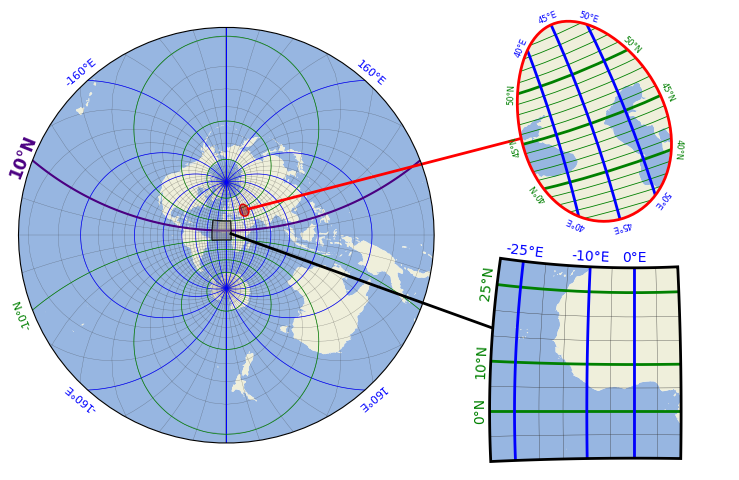

In [1]:
# EOmaps example:  Customized gridlines

from eomaps import Maps

m = Maps(crs=Maps.CRS.Stereographic())
m.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

m.add_feature.preset.ocean()
m.add_feature.preset.land()

# draw a regular 5 degree grid
m.add_gridlines(5, lw=0.25, alpha=0.5)
# draw a grid with 20 degree longitude spacing and add labels
g = m.add_gridlines((20, None), c="b", n=500)
g.add_labels(offset=10, fontsize=8, c="b")
# draw a grid with 20 degree latitude spacing, add labels and exclude the 10° tick
g = m.add_gridlines((None, 20), c="g", n=500)
g.add_labels(where="l", offset=10, fontsize=8, c="g", exclude=[10])
# explicitly highlight 10°N line and add a label on one side of the map
g = m.add_gridlines((None, [10]), c="indigo", n=500, lw=1.5)
g.add_labels(where="l", fontsize=12, fontweight="bold", c="indigo")


# ----------------- first inset-map
mi = m.new_inset_map(xy=(45, 45), radius=10, inset_crs=m.crs_plot)
mi.add_feature.preset.ocean()
mi.add_feature.preset.land()

# draw a regular 1 degree grid
g = mi.add_gridlines((None, 1), c="g", lw=0.6)
# add some specific latitude gridlines and add labels
g = mi.add_gridlines((None, [40, 45, 50]), c="g", lw=2)
g.add_labels(where="lr", offset=7, fontsize=6, c="g")
# add some specific longitude gridlines and add labels
g = mi.add_gridlines(([40, 45, 50], None), c="b", lw=2)
g.add_labels(where="tb", offset=7, fontsize=6, c="b")

mi.add_extent_indicator(m, fc="darkred", ec="none", alpha=0.5)
mi.add_indicator_line()

# ----------------- second inset-map
mi = m.new_inset_map(
    inset_crs=m.crs_plot,
    xy=(-10, 10),
    radius=20,
    shape="rectangles",
    boundary=dict(ec="k"),
)
mi.add_feature.preset.ocean()
mi.add_feature.preset.land()

mi.add_extent_indicator(m, fc=".5", ec="none", alpha=0.5)
mi.add_indicator_line(c="k")

# draw a regular 1 degree grid
g = mi.add_gridlines(5, lw=0.25)
# add some specific latitude gridlines and add labels
g = mi.add_gridlines((None, [0, 10, 25]), c="g", lw=2)
g.add_labels(where="l", fontsize=10, c="g")
# add some specific longitude gridlines and add labels
g = mi.add_gridlines(([-25, -10, 0], None), c="b", lw=2)
g.add_labels(where="t", fontsize=10, c="b")

m.apply_layout(
    {
        "figsize": [7.39, 4.8],
        "0_map": [0.025, 0.07698, 0.5625, 0.86602],
        "1_inset_map": [0.7, 0.53885, 0.225, 0.41681],
        "2_inset_map": [0.6625, 0.03849, 0.275, 0.42339],
    }
)
m.show()